# Dogs vs Cats Redux

First we need to create a directory structure and get a small sample of training and validation data using bash makeDirStruct.sh

In [58]:
import os
cwd = os.getcwd()

In [9]:
main_path = cwd + "\\data\\dogscats\\"
data_path = cwd + "\\data\\dogscats\\sample\\"
#data_path = "data/dogscats/"
test_path = data_path + "test\\"

In [1]:
main_path = cwd + "/data/dogscats/"
data_path = "data/dogscats/sample/"
#data_path = "data/dogscats/"
test_path = data_path + "test/"

In [ ]:
Load utils and initialize custom Tensorflow session for Keras

In [2]:
%matplotlib inline
from imp import reload
import utils; reload(utils)
from utils import *

Using TensorFlow backend.


In [3]:
batch_size=4

# Finetune and train

In [4]:
from vgg16 import Vgg16

In [5]:
vgg = Vgg16()

L:\Data Science\Fast.ai\github_repo\courses\deeplearning1\nbs\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
L:\Data Science\Fast.ai\github_repo\courses\deeplearning1\nbs\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
L:\Data Science\Fast.ai\github_repo\courses\deeplearning1\nbs\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
L:\Data Science\Fast.ai\github_repo\courses\deeplearning1\nbs\vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


In [11]:
batches = vgg.get_batches(data_path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(data_path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)

Found 400 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [12]:
vgg.fit(batches,val_batches,nb_epoch=1)

L:\Data Science\Fast.ai\github_repo\courses\deeplearning1\nbs\vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, nb_val_samples=val_batches.samples)
L:\Data Science\Fast.ai\github_repo\courses\deeplearning1\nbs\vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=1, validation_data=<keras.pre..., validation_steps=80, steps_per_epoch=100)`
  validation_data=val_batches, nb_val_samples=val_batches.samples)


Epoch 1/1
100/100 [==============================] - 62s - loss: 0.8599 - acc: 0.7400 - val_loss: 0.4348 - val_acc: 0.8125


In [14]:
vgg.model.save_weights('data/dogscats/results/ft1.h5')

In [12]:
vgg.model.load_weights('data/dogscats/results/ft1.h5')

In [13]:
vgg.model.load_weights(main_path+'results\\ft1.h5')

In [21]:
test_batches = vgg.get_batches(test_path,shuffle=False,batch_size=batch_size*2,class_mode=None)
print(test_batches.samples)

Found 100 images belonging to 1 classes.
100


In [25]:
prediction = vgg.model.predict_generator(test_batches, steps = test_batches.samples // (batch_size))

In [26]:
filenames = test_batches.filenames
print(len(filenames))

100


In [28]:
print(prediction.shape)
prediction[:5]

(100, 2)


array([[  1.0000e+00,   1.6559e-07],
       [  7.6282e-01,   2.3718e-01],
       [  9.9969e-01,   3.1085e-04],
       [  5.3787e-02,   9.4621e-01],
       [  8.5949e-01,   1.4051e-01]], dtype=float32)

In [15]:
filenames[:5]

['unknown\\10023.jpg',
 'unknown\\10038.jpg',
 'unknown\\10184.jpg',
 'unknown\\10358.jpg',
 'unknown\\10418.jpg']

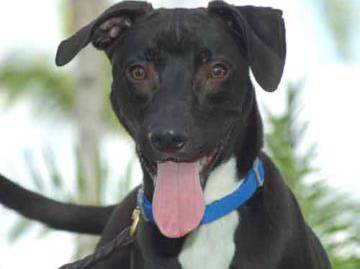

In [31]:
from PIL import Image
Image.open(test_path.replace("/","\\")+filenames[0])

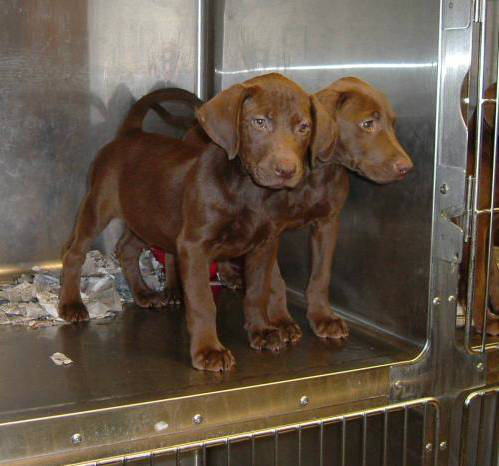

In [33]:
Image.open(test_path.replace("/","\\")+filenames[1])

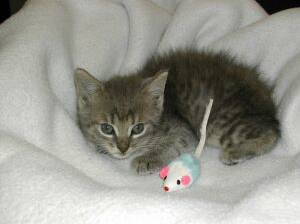

In [34]:
Image.open(test_path.replace("/","\\")+filenames[2])

In [61]:
isdog = prediction[:,1]
isdog = np.clip(isdog,0.025,0.975)
isdog[:5]

array([ 0.025 ,  0.2372,  0.025 ,  0.9462,  0.1405], dtype=float32)

In [41]:
import re
pattern = re.compile('\d+')
ids = [pattern.search(x).group() for x in filenames]
ids[-5:]


['9152', '97', '9803', '9950', '9997']

In [37]:
print(len(ids))
print(len(isdog))

100
100


In [62]:
import pandas as pd
subm_df = pd.DataFrame({'id':ids,'label':isdog})
subm_df.head()

,id,label
0,10023,0.025000
1,10038,0.237180
2,10184,0.025000
3,10358,0.946213
4,10418,0.140508


In [63]:
subm_df.to_csv('data/dogscats/results/' + 'subm001.csv',index=False)

In [60]:
from IPython.display import FileLink
FileLink('data/dogscats/results/' + 'subm001.csv')

L:\Data Science\Fast.ai\github_repo\courses\deeplearning1\nbs\data\dogscats\results\subm001.csv